# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


In [3]:
#cities=['Chicago', 'Detroit']
cities

['kirakira',
 'college',
 'haiku-pauwela',
 'bredasdorp',
 'betio village',
 'choyr',
 'port-aux-francais',
 'tha mai',
 'mount gambier',
 'taiohae',
 'cururupu',
 'lamu',
 'goba',
 'port elizabeth',
 'ilhabela',
 'olonkinbyen',
 'bethel',
 'crane',
 'hasaki',
 'puerto baquerizo moreno',
 'uturoa',
 'blackmans bay',
 'ushuaia',
 'jamestown',
 'wurtulla',
 'anadyr',
 'baganga',
 'grytviken',
 'tiksi',
 'papatowai',
 'waitangi',
 'edinburgh of the seven seas',
 'corinto',
 'berezovyy',
 'lagoa',
 'ust-nera',
 'borsad',
 "qal'at bishah",
 'holualoa',
 'namibe',
 'nasiriyah',
 'serrinha',
 'salinopolis',
 'usinsk',
 'kavaratti',
 'nogliki',
 'tralee',
 'devinuwara',
 'isafjordur',
 'tura',
 'longyearbyen',
 'puerto ayora',
 'adamstown',
 'huilong',
 'luderitz',
 'gisborne',
 'albany',
 'viljandi',
 "ust'-kulom",
 'phalaborwa',
 'whitehorse',
 'nagqu',
 'west island',
 'vila velha',
 'karratha',
 'san antonio de pale',
 'georgetown',
 'bakanas',
 'banjar',
 'hithadhoo',
 'alice springs',
 '

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = url + "&q=" + city
    # Build partial query URL
    #city_url = f"{url}?q={city}&app"
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date =  city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("------------------#-----------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kirakira
Processing Record 2 of Set 1 | college
Processing Record 3 of Set 1 | haiku-pauwela
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | betio village
Processing Record 6 of Set 1 | choyr
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | tha mai
Processing Record 9 of Set 1 | mount gambier
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | cururupu
Processing Record 12 of Set 1 | lamu
Processing Record 13 of Set 1 | goba
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | ilhabela
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | crane
Processing Record 19 of Set 1 | hasaki
Processing Record 20 of Set 1 | puerto baquerizo moreno
Processing Record 21 of Set 1 | uturoa
Processing Record 22 of Set 1 | b

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64


In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kirakira,-10.4544,161.9205,25.00,90,76,1.90,SB,1726414219
1,college,64.8569,-147.8028,9.04,86,100,2.06,US,1726414220
2,haiku-pauwela,20.9219,-156.3051,23.01,73,75,7.20,US,1726413636
3,bredasdorp,-34.5322,20.0403,15.12,74,60,6.81,ZA,1726414222
4,betio village,1.3580,172.9211,26.02,74,48,4.34,KI,1726414224


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kirakira,-10.4544,161.9205,25.00,90,76,1.90,SB,1726414219
1,college,64.8569,-147.8028,9.04,86,100,2.06,US,1726414220
2,haiku-pauwela,20.9219,-156.3051,23.01,73,75,7.20,US,1726413636
3,bredasdorp,-34.5322,20.0403,15.12,74,60,6.81,ZA,1726414222
4,betio village,1.3580,172.9211,26.02,74,48,4.34,KI,1726414224


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

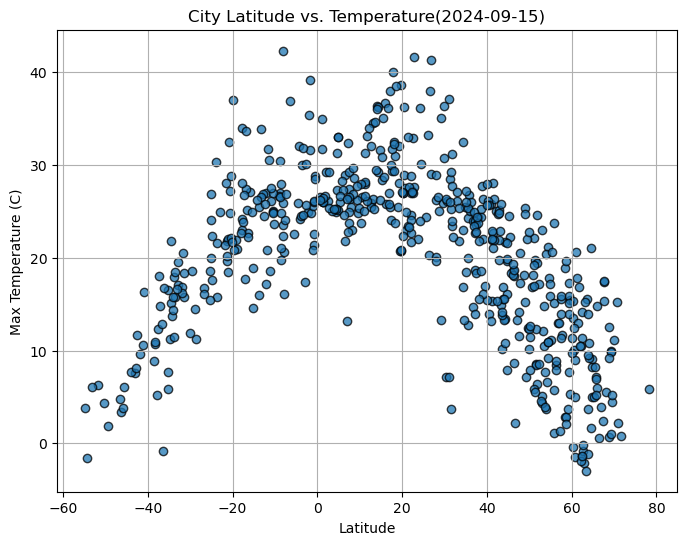

In [19]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8,6))
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Temperature(2024-09-15)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

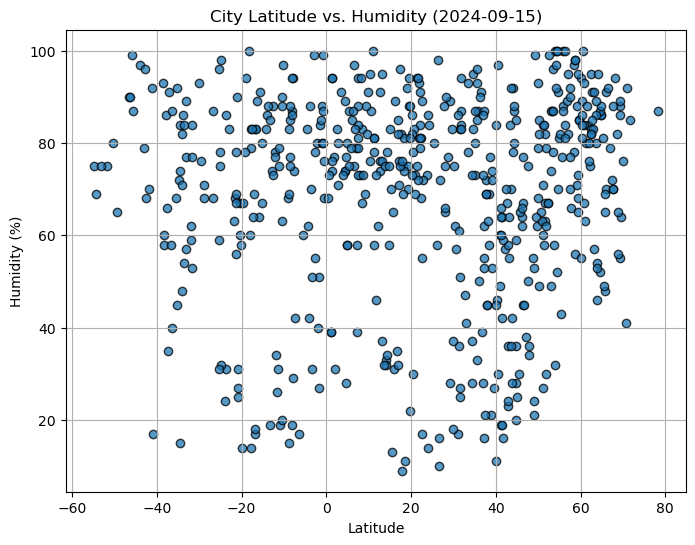

In [20]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8,6))
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2024-09-15)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

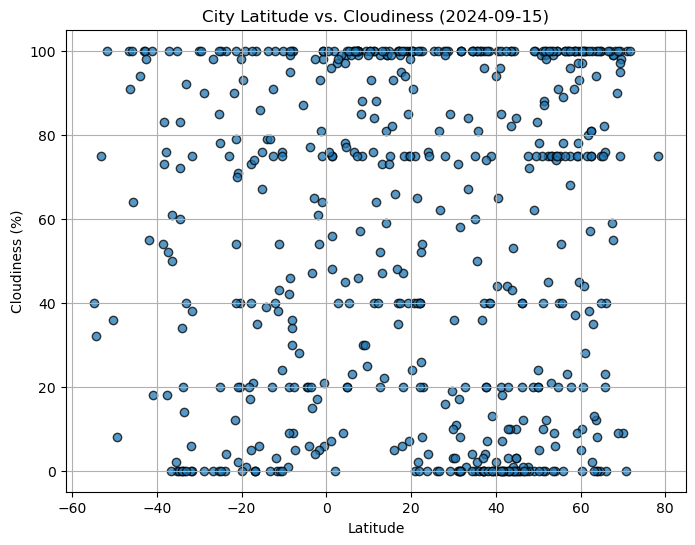

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8,6))
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2024-09-15)')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

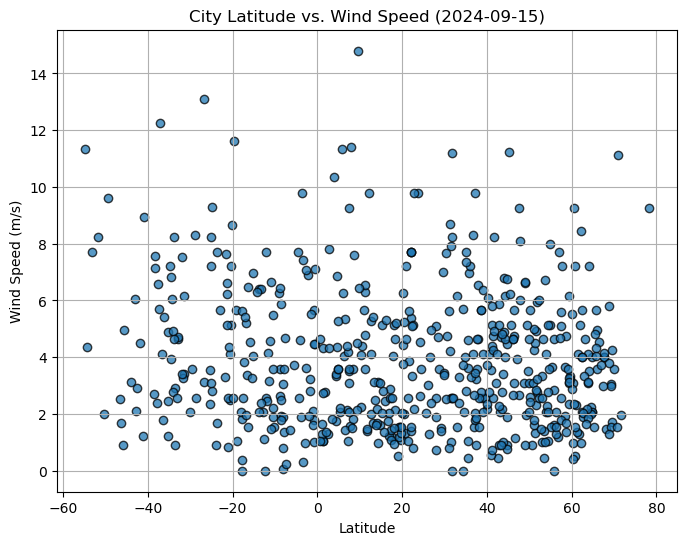

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8,6))
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2024-09-15)')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [70]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis, eq_loc):
    corr = st.pearsonr(x_axis, y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
    p_fit = p_slope * x_axis + p_int
    eq = f"y ={p_slope: .2f}x +{p_int: .2f}"
    #Create the line
    plt.scatter(x_axis, y_axis, marker="o")
    plt.plot(x_axis,p_fit,"--", color='red')
    plt.annotate(eq, eq_loc, fontsize=12, color='red')
    print(f"The r-value is {round(corr[0],2)}")

In [71]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,college,64.8569,-147.8028,9.04,86,100,2.06,US,1726414220
2,haiku-pauwela,20.9219,-156.3051,23.01,73,75,7.20,US,1726413636
4,betio village,1.3580,172.9211,26.02,74,48,4.34,KI,1726414224
5,choyr,46.3611,108.3611,8.61,67,0,4.76,MN,1726414225
7,tha mai,12.6214,102.0048,25.92,91,99,2.00,TH,1726414227


In [72]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kirakira,-10.4544,161.9205,25.00,90,76,1.90,SB,1726414219
3,bredasdorp,-34.5322,20.0403,15.12,74,60,6.81,ZA,1726414222
6,port-aux-francais,-49.3500,70.2167,1.90,65,8,9.61,TF,1726413691
8,mount gambier,-37.8333,140.7667,5.21,86,76,2.37,AU,1726414228
9,cururupu,-1.8283,-44.8683,31.61,51,54,2.80,BR,1726414231


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.77


Text(0, 0.5, 'Temperature(C)')

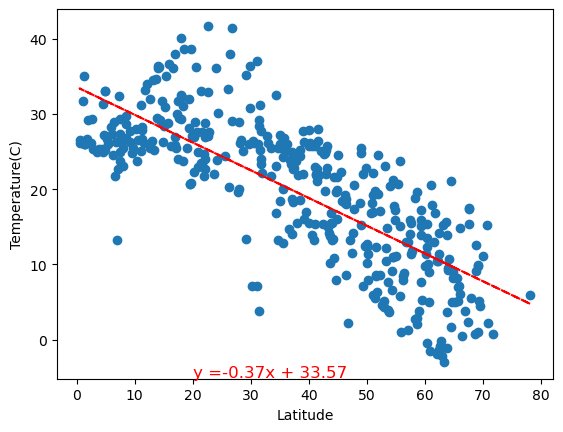

In [126]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],(20, -5))
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')

The r-value is 0.8


Text(0, 0.5, 'Temperature(C)')

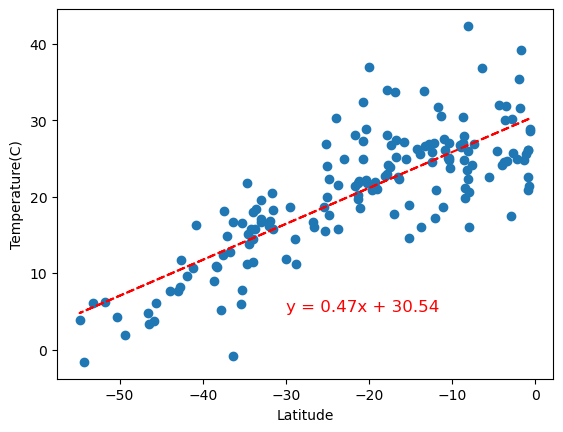

In [127]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],(-30, 5))
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')

**Discussion about the linear relationship:** The northern hemisphere has a city's latitude and temperature have a negative correlation of -0.77 which means the higher the latitude of the city the lower the temperature the city produces. In contrast, the southern hemisphere, a city's latitude and temperature have a positive correlation of 0.80 which means the higher the latitude of the city, the higher the temperature of the city produces.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.07


Text(0, 0.5, 'Humidity(%)')

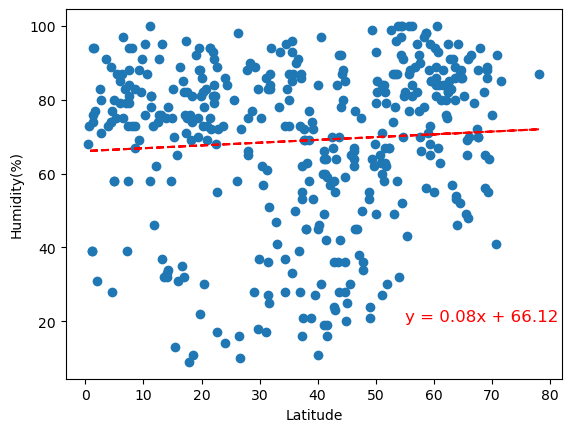

In [130]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],(55, 20))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

The r-value is -0.1


Text(0, 0.5, 'Humidity(%)')

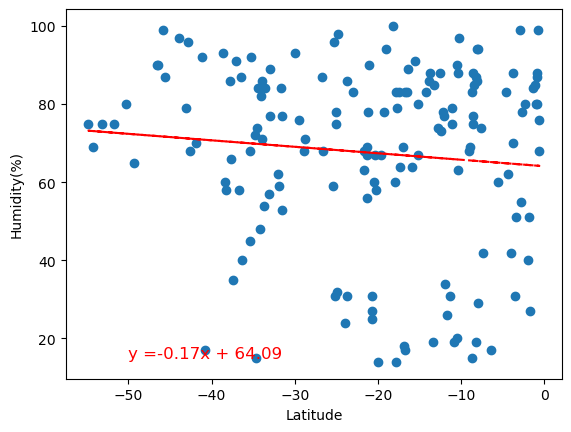

In [131]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],(-50, 15))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

**Discussion about the linear relationship:** The northern hemisphere city's latitude and humidity have a weak correlation of 0.07 which means as latitude increases, the humidity is likely to slowly increase as well. In contrast, the southern hemisphere, a city's latitude and humidity also have a weak correlation of -0.01 which means the latitude of the city increases, the humidity slowly decreases.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is -0.09


Text(0, 0.5, 'Cloudiness(%)')

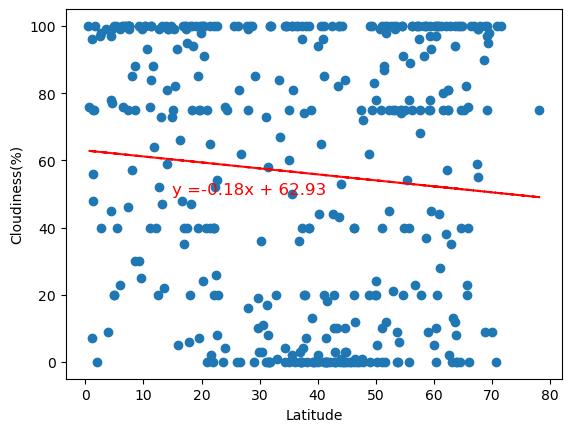

In [133]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],(15, 50))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

The r-value is -0.07


Text(0, 0.5, 'Cloudiness(%)')

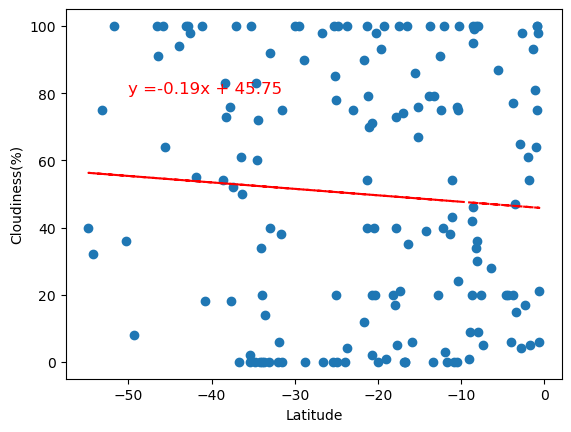

In [134]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],(-50, 80))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

**Discussion about the linear relationship:** The northern hemisphere city's latitude and cloudiness have a weak correlation of -0.09 which means as latitude increases, the cloudiness slowly decreases. In contrast, the southern hemisphere, a city's latitude and cloudiness also have a weak correlation of -0.07 which means as the city's latitude increases, the cloudiness decreases.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.03


Text(0, 0.5, 'Wind Speed(m/s)')

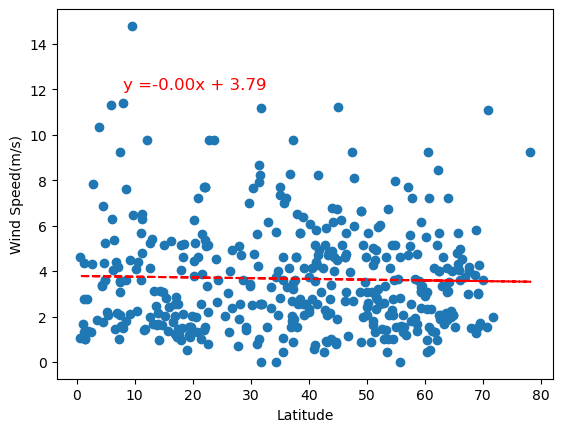

In [118]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],(8, 12))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

The r-value is -0.21


Text(0, 0.5, 'Wind Speed(m/s)')

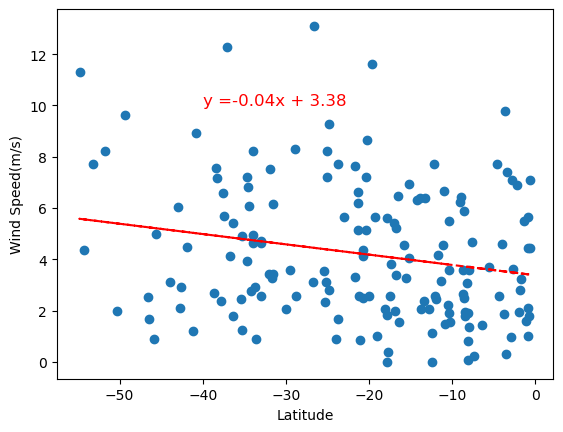

In [124]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],(-40, 10))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

**Discussion about the linear relationship:** In the northern hemisphere city's latitude and wind speed have no correlation (-0.03) which means the city's wind speed doesn't relate well to it's latitude. In contrast, the southern hemisphere, a city's latitude and wind speed have a correlation of -0.21, a small correlation between city's latitude and wind speed.